## The Bernstein-Vazirani Algorithm Implementation in Qiskit

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [41]:
# Define the unknown bit string 'a' and the single bit 'b'
a = '101'  # Example bit string
b = 0       # Example value of b

n = len(a)
print(n)

# Initialize the circuit
qc = QuantumCircuit(n + 1, n)

# Apply Hadamard gates to the first n qubits and prepare the helper qubit
qc.h(range(n))
qc.x(n)
qc.h(n)

# Implement the oracle
for i, bit in enumerate(reversed(a)):
    if bit == '1':
        qc.cx(i, n)

# Apply Hadamard gates again
qc.h(range(n))

# Measure the first n qubits
qc.measure(range(n), range(n))

# Display the circuit
# qc.draw(output='mpl')/

3


Counts(ideal): {'101': 1024}


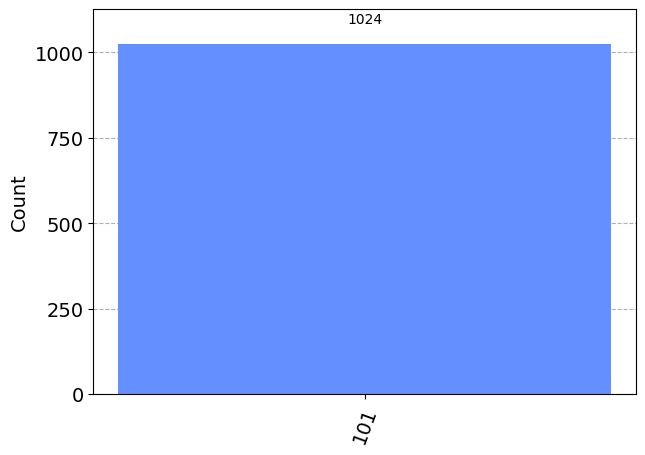

In [42]:
# Running the circuit
from qiskit_aer import AerSimulator

# we will use Aer's qasm_simulator
aersim = AerSimulator()

# get the results and the counts and plot a histogram
result_ideal = aersim.run(qc, shots = 1024).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)

plot_histogram(counts_ideal)

Counts(noise): {'011': 2, '111': 16, '110': 4, '100': 137, '001': 45, '010': 1, '000': 5, '101': 814}


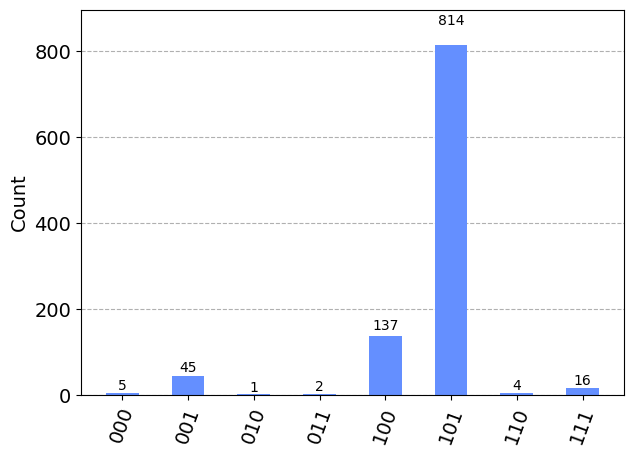

In [43]:
from qiskit.providers.fake_provider import FakeManilaV2

# Construct a noisy simulator backend from an IBMQ backend
# This simulator backend will be automatically configured
# using the device configuration and noise model
backend = FakeManilaV2()
aersim_backend = AerSimulator.from_backend(backend)

# Perform noisy simulation
result_noise = aersim_backend.run(qc, shots = 1024).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)

plot_histogram(counts_noise)

Text(0, 0.5, 'Execution Time')

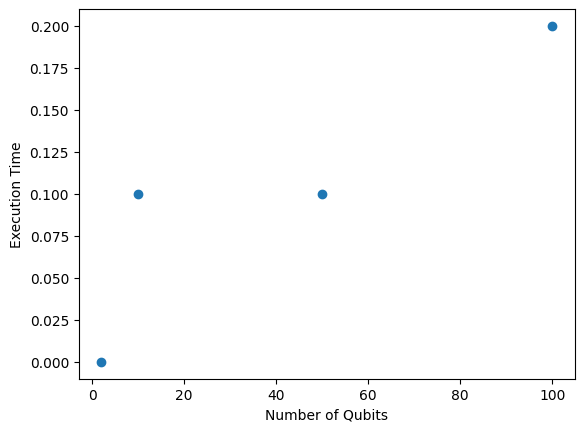

In [38]:
# plot for scalability of circuit

import matplotlib.pyplot as plt

num_qubits = [2, 10, 50, 100]
exec_time = [0.0, 0.1, 0.1, 0.2]

plt.scatter(num_qubits, exec_time)
plt.xlabel("Number of Qubits")
plt.ylabel("Execution Time")